In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_excel("1.5 Mld (Multiple Output).xlsx")

# Separate features and targets
X = df.drop(['STP_Outlet-BOD_U', 'STP_Outlet-COD_U', 'STP_Outlet-TSS_U'], axis=1)
y = df[['STP_Outlet-COD_U', 'STP_Outlet-BOD_U', 'STP_Outlet-TSS_U']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP regressor model
mlp = MLPRegressor(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(2048, 1024), (2048, 512)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'max_iter': [1000],
    'tol': [1e-4],
    'n_iter_no_change': [10],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp, param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Build the MLP regression model with the best parameters
model = MLPRegressor(**best_params, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on training set and testing set
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate metrics for testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print metrics for both sets
print("Training Set Metrics:")
print("Mean Squared Error (MSE) on Training Set:", mse_train)
print("R-squared (R2) on Training Set:", r2_train)
print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE) on Testing Set:", mse_test)
print("R-squared (R2) on Testing Set:", r2_test)

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred_test.flatten())
plt.title('Actual vs. Predicted Values (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit a linear regression model to the data
regression_line = linregress(y_test.values.flatten(), y_pred_test.flatten())
sorted_indices = np.argsort(y_test.values.flatten())
plt.plot(y_test.values.flatten()[sorted_indices], regression_line.intercept + regression_line.slope * y_test.values.flatten()[sorted_indices], color='red')

plt.show()

Training Set Metrics:
Mean Squared Error (MSE) on Training Set: 8.170850613732226
R-squared (R2) on Training Set: 0.5369369959552972

Testing Set Metrics:
Mean Squared Error (MSE) on Testing Set: 7.08753792249578
R-squared (R2) on Testing Set: 0.43879464413648134


C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Tejash\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


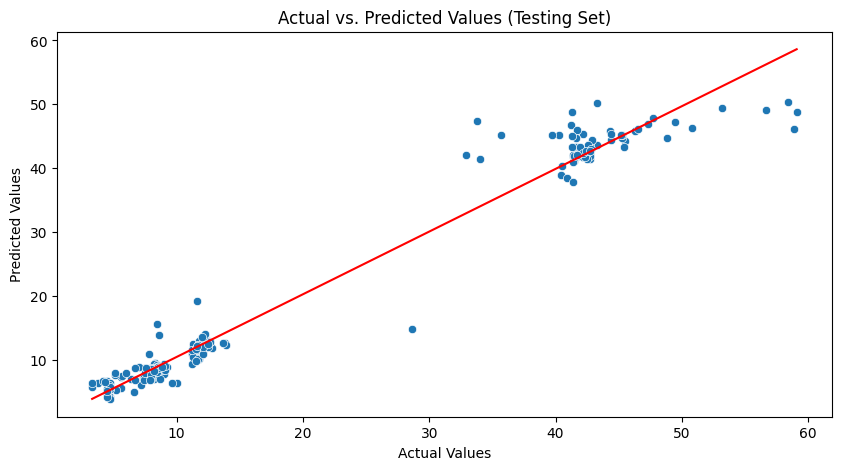

In [1]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_excel("1.5 Mld (Multiple Output).xlsx")

# Separate features and targets
X = df.drop(['STP_Outlet-BOD_U', 'STP_Outlet-COD_U', 'STP_Outlet-TSS_U'], axis=1)
y = df[['STP_Outlet-COD_U', 'STP_Outlet-BOD_U', 'STP_Outlet-TSS_U']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the MLP regressor model
mlp = MLPRegressor(random_state=42)

# Define the parameter grid for grid search
param_grid = {
    'hidden_layer_sizes': [(2048, 1024), (1024, 512)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'max_iter': [1000],
    'tol': [1e-4],
    'n_iter_no_change': [10],
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(mlp, param_grid, scoring=make_scorer(mean_squared_error, greater_is_better=False), cv=5)
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Build the MLP regression model with the best parameters
model = MLPRegressor(**best_params, random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Predict on training set and testing set
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Calculate metrics for training set
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Calculate metrics for testing set
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print metrics for both sets
print("Training Set Metrics:")
print("Mean Squared Error (MSE) on Training Set:", mse_train)
print("R-squared (R2) on Training Set:", r2_train)
print("\nTesting Set Metrics:")
print("Mean Squared Error (MSE) on Testing Set:", mse_test)
print("R-squared (R2) on Testing Set:", r2_test)

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred_test.flatten())
plt.title('Actual vs. Predicted Values (Testing Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# Fit a linear regression model to the data
regression_line = linregress(y_test.values.flatten(), y_pred_test.flatten())
sorted_indices = np.argsort(y_test.values.flatten())
plt.plot(y_test.values.flatten()[sorted_indices], regression_line.intercept + regression_line.slope * y_test.values.flatten()[sorted_indices], color='red')

plt.show()